In [102]:
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

In [1]:
filename = '11-0.txt'
with open(filename, encoding='utf-8') as f:
    text = f.read()
start = 'CHAPTER XII.   Alice’s Evidence'
end = '\n\nTHE END \n\n\n\n\n***'
chapters = text[text.index(start)+len(start)+5:text.index(end)].lower().split('\n\n\n\n\n')

In [2]:
import nltk
import string
import re
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
data = pd.DataFrame({'Chapter': range(1,13), 'Before preprocessing': chapters})

stop_words = stopwords.words("english")

pr_chapters = chapters.copy()

for i in range(len(chapters)):

    pr_chapters[i] = re.sub("[^a-zA-Z ]+", " ", pr_chapters[i])
    pr_chapters[i] = re.sub("-", " ", pr_chapters[i])
    pr_chapters[i] = re.sub(" +", " ", pr_chapters[i])
    pr_chapters[i] = re.sub(r"[^\w\s]", "", pr_chapters[i], re.UNICODE)
    pr_chapters[i] = WhitespaceTokenizer().tokenize(pr_chapters[i])
    pr_chapters[i] = pr_chapters[i][2:]
    pr_chapters[i] = [token for token in pr_chapters[i] if token not in stop_words]
    pr_chapters[i] = [WordNetLemmatizer().lemmatize(token) for token in pr_chapters[i]]
    #pr_chapters[i] = [PorterStemmer().stem(token) for token in pr_chapters[i]]

data['After preprocessing'] = [' '.join(pr_chapters[i]) for i in range(len(chapters))]
data

,Chapter,Before preprocessing,After preprocessing
0,1,chapter i.\ndown the rabbit-hole\n\n\nalice wa...,rabbit hole alice beginning get tired sitting ...
1,2,chapter ii.\nthe pool of tears\n\n\n“curiouser...,pool tear curiouser curiouser cried alice much...
2,3,chapter iii.\na caucus-race and a long tale\n\...,caucus race long tale indeed queer looking par...
3,4,chapter iv.\nthe rabbit sends in a little bill...,rabbit sends little bill white rabbit trotting...
4,5,chapter v.\nadvice from a caterpillar\n\n\nthe...,advice caterpillar caterpillar alice looked ti...
5,6,chapter vi.\npig and pepper\n\n\nfor a minute ...,pig pepper minute two stood looking house wond...
6,7,chapter vii.\na mad tea-party\n\n\nthere was a...,mad tea party table set tree front house march...
7,8,chapter viii.\nthe queen’s croquet-ground\n\n\...,queen croquet ground large rose tree stood nea...
8,9,chapter ix.\nthe mock turtle’s story\n\n\n“you...,mock turtle story think glad see dear old thin...
9,10,chapter x.\nthe lobster quadrille\n\n\nthe moc...,lobster quadrille mock turtle sighed deeply dr...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tftidf = TfidfVectorizer()
vectorizer_tftidf.fit(data['After preprocessing'].tolist())
chapters_tfidf = vectorizer_tftidf.transform(data['After preprocessing'].tolist())

freq_words = pd.DataFrame(chapters_tfidf.toarray(), columns=vectorizer_tftidf.get_feature_names_out())
freq_words = freq_words.drop(columns = 'alice', axis = 1)
freq_words

,abide,able,absence,absurd,acceptance,accident,accidentally,account,accounting,accusation,...,yelled,yelp,yer,yes,yesterday,yet,young,youth,zealand,zigzag
0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016110,0.000000,0.000000,0.000000,0.000000,0.031144,0.000000
1,0.000000,0.0299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022683,0.013143,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.000000,0.025684,0.029907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.015470,0.000000,0.000000,0.020365,0.000000,0.000000,0.000000
3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024775,0.099099,0.000000,0.000000,0.043561,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050444,0.015628,0.137708,0.000000,0.022951
5,0.021096,0.0000,0.000000,0.018117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009273,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.026966,0.000000,0.022916,0.011833,0.000000,0.000000,0.000000
7,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018068,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021765,0.015960,0.009248,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0000,0.019076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.029602,0.000000,0.016770,0.025979,0.000000,0.000000,0.000000
9,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017226,0.000000,...,0.017226,0.000000,0.000000,0.017821,0.013068,0.000000,0.000000,0.000000,0.000000,0.000000


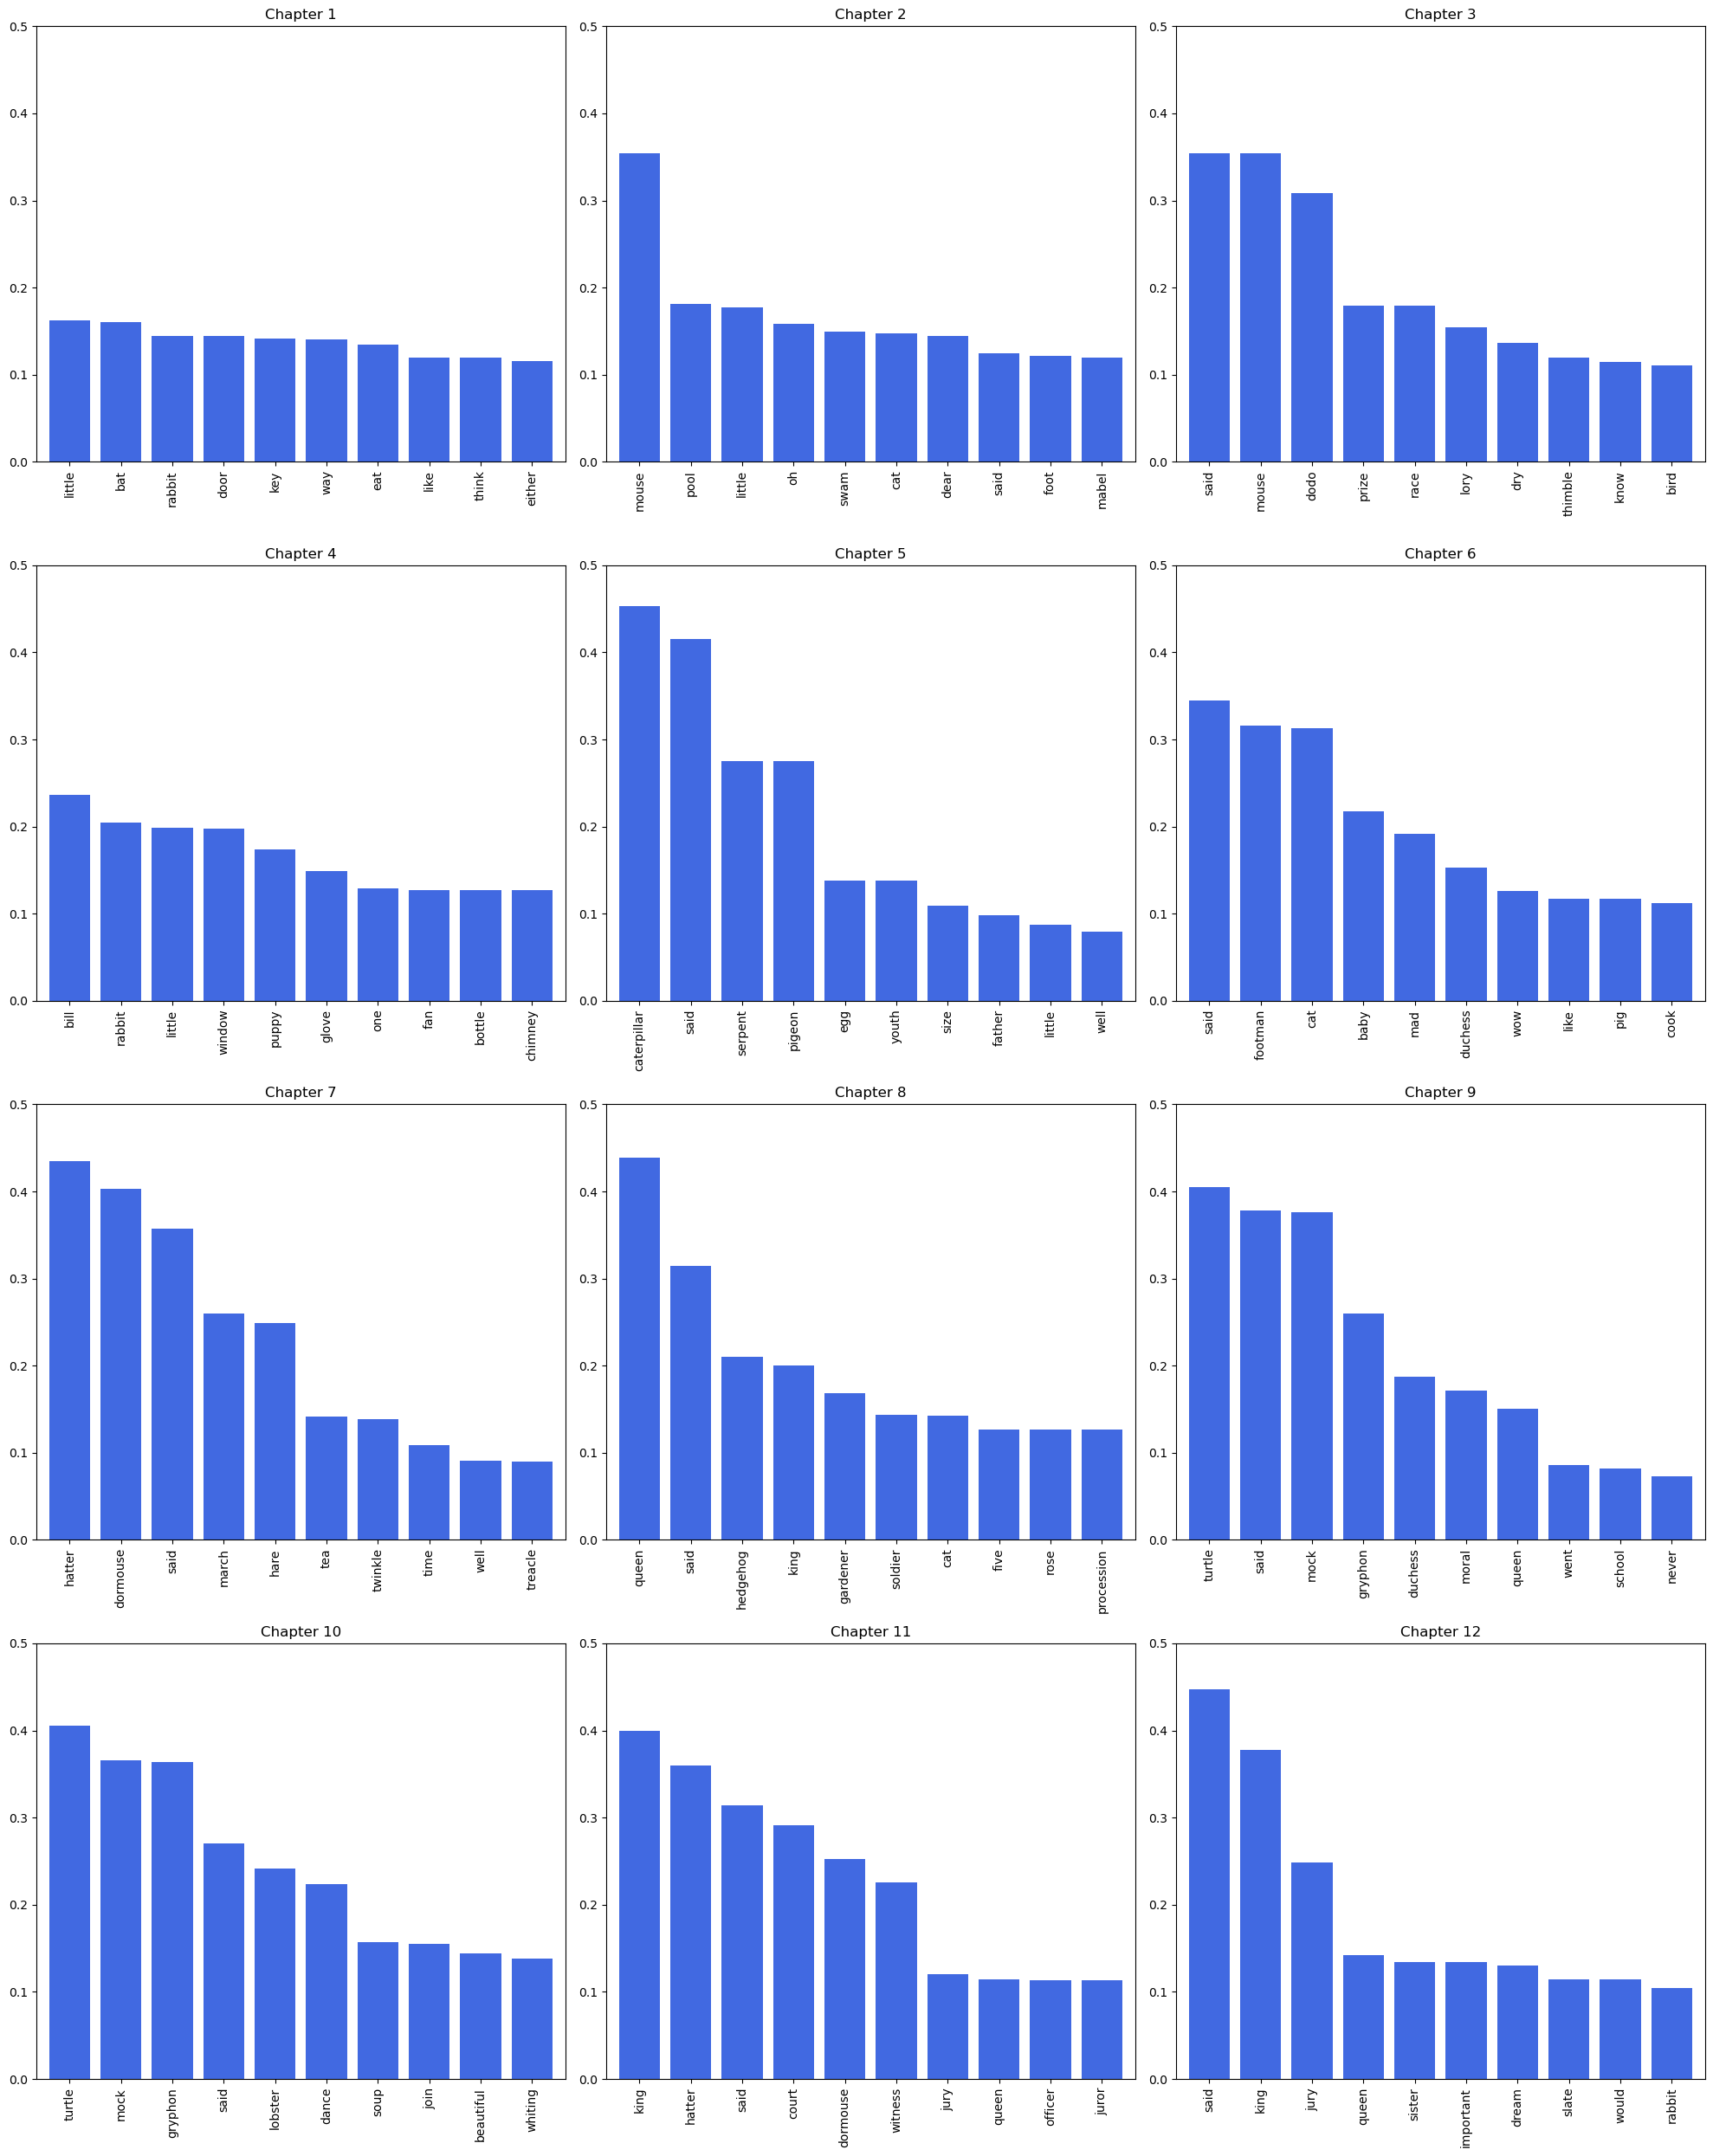

In [8]:
import matplotlib.pyplot as plt

top_words = []
plt.figure(figsize=(20, 25))
for i in range(len(chapters)):
    top_words.append(freq_words.loc[i, :].sort_values(ascending=False).head(10))
    plt.subplot(4, 3, i+1)
    plt.title(f'Chapter {i+1}')
    plt.tight_layout()

    top_words[i].plot.bar(color = 'royalblue', width = 0.8, ylim = (0,0.5))

In [11]:
sentences = re.split('[.?!]', ' '.join(chapters))
sentences_with_Alice = ' '.join(sentence for sentence in sentences if 'alice' in sentence)

sentences_with_Alice = re.sub("[^a-zA-Z ]+", " ", sentences_with_Alice)
sentences_with_Alice = re.sub("-", " ", sentences_with_Alice)
sentences_with_Alice = re.sub(" +", " ", sentences_with_Alice)
sentences_with_Alice = WhitespaceTokenizer().tokenize(sentences_with_Alice)
sentences_with_Alice = [token for token in sentences_with_Alice if token not in stop_words]
sentences_with_Alice = [WordNetLemmatizer().lemmatize(token) for token in sentences_with_Alice]

tags = nltk.pos_tag(sentences_with_Alice)
verbs = [verb for verb, tag in tags if tag in ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']]
verbs = [WordNetLemmatizer().lemmatize(verb, 'v') for verb in verbs]

from collections import Counter
verbs = sorted(Counter(sentences_with_Alice).items(), key = lambda x:x[1], reverse = True)[1:]
print('Top 10 verbs:\n')
print(*verbs[:10], sep = '\n')

Top 10 verbs:

('said', 174)
('thought', 60)
('little', 42)
('like', 35)
('would', 31)
('could', 31)
('way', 30)
('went', 30)
('much', 29)
('quite', 28)
